In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load your dataset
data = pd.read_csv('../raw dataset/rawdata.csv') 


In [ ]:
# Data Preprocessing
numerical_features = ['purchase_frequency', 'loyalty_score', 'annual_income']
categorical_features = ['region']  


In [18]:

# Impute missing values and remove duplicates
data.drop_duplicates(inplace=True)
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [19]:
# Apply imputers
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

In [21]:
## Feature Engineering
# Creating derived metrics
data['purchase_to_income_ratio'] = data['purchase_frequency'] / data['annual_income']
data['loyalty_adjusted_income'] = data['annual_income'] * data['loyalty_score']


In [16]:
print(data.columns)

Index(['user_id', 'age', 'annual_income', 'purchase_amount', 'loyalty_score',
       'region', 'purchase_frequency'],
      dtype='object')


In [22]:
## Data Transformation
# Scale numerical features and encode categorical variables
scaler = StandardScaler()
data[numerical_features + ['purchase_to_income_ratio', 'loyalty_adjusted_income']] = \
    scaler.fit_transform(data[numerical_features + ['purchase_to_income_ratio', 'loyalty_adjusted_income']])

In [23]:
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


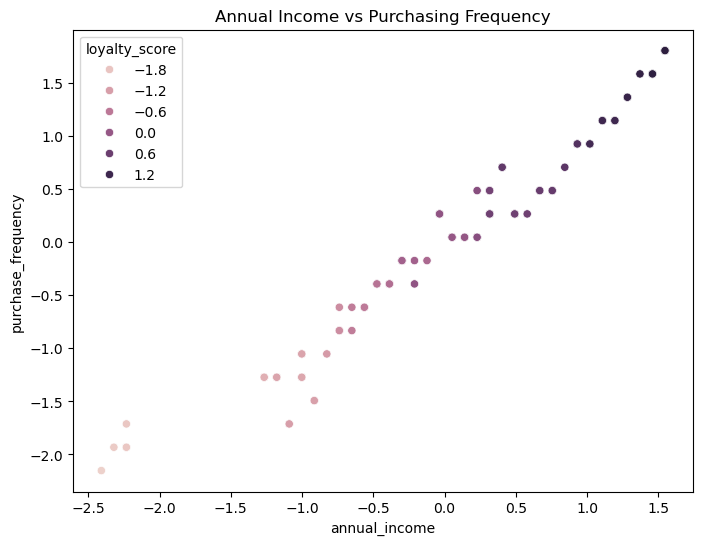

In [ ]:

## Visualizations
# Scatter plot for Annual Income vs Purchasing Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='annual_income', y='purchase_frequency', hue='loyalty_score')
plt.title('Annual Income vs Purchasing Frequency')
plt.show()

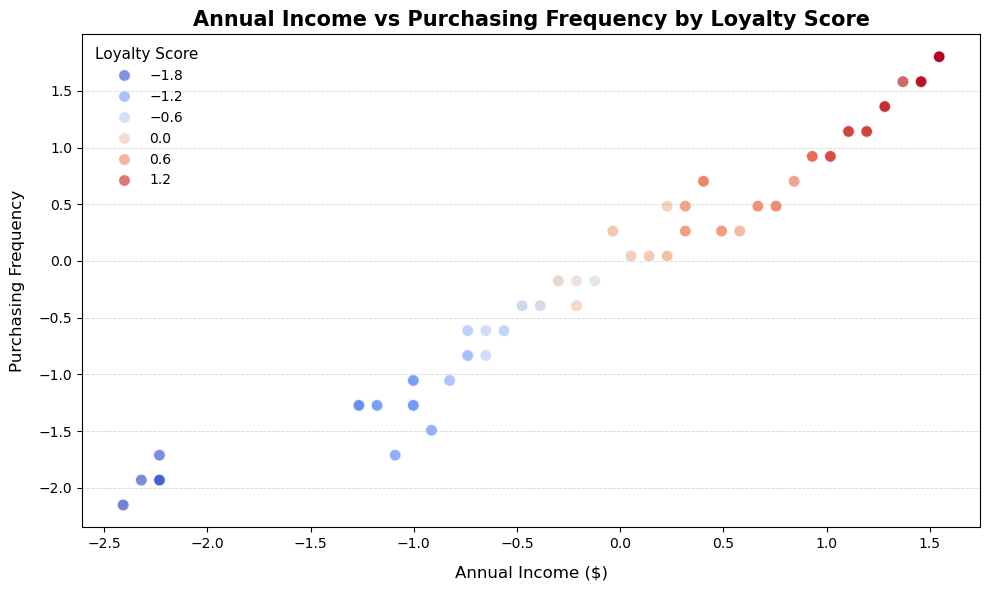

In [ ]:
#Beautified the above graph
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=data, 
    x='annual_income', 
    y='purchase_frequency', 
    hue='loyalty_score', 
    palette='coolwarm',  
    s=70,  
    alpha=0.7  
)

plt.title('Annual Income vs Purchasing Frequency by Loyalty Score', fontsize=15, weight='semibold')
plt.xlabel('Annual Income ($)', fontsize=12, labelpad=10)
plt.ylabel('Purchasing Frequency', fontsize=12, labelpad=10)

plt.legend(title='Loyalty Score', title_fontsize=11, fontsize=10, loc='upper left', frameon=False)


plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)

plt.tight_layout()
plt.show()


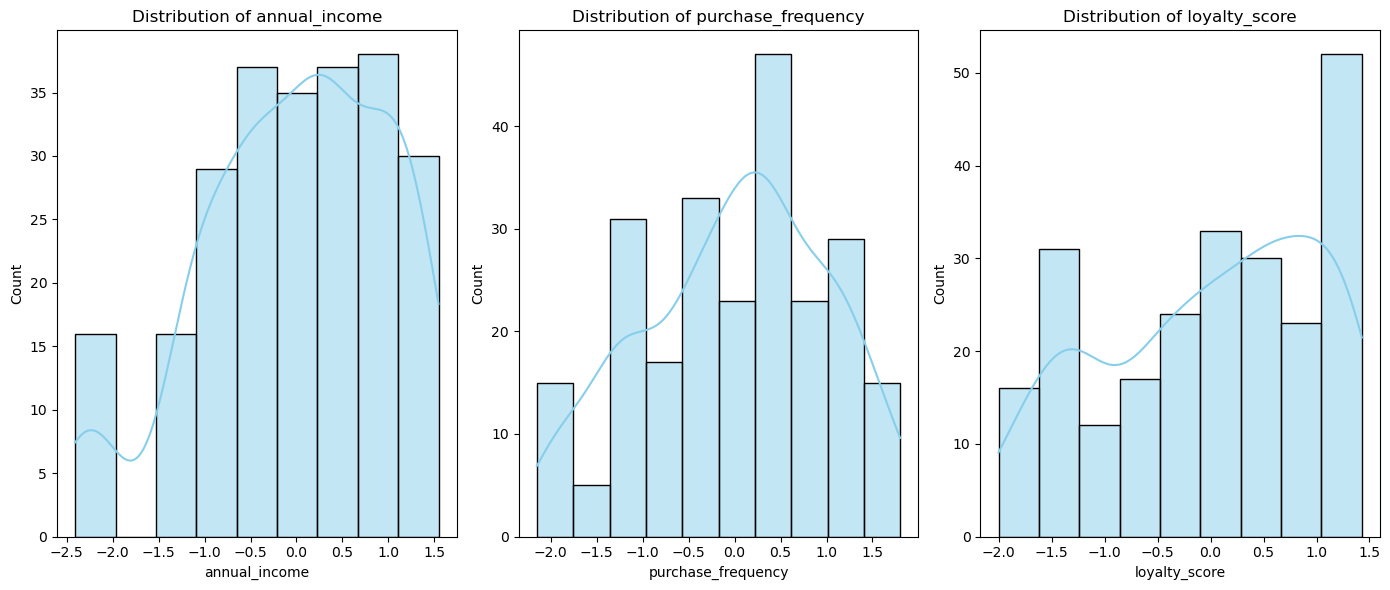

In [ ]:
# Histograms for key numerical features
#Can help in verifying data spread, skewness, and potential outliers.
plt.figure(figsize=(14, 6))
for i, feature in enumerate(['annual_income', 'purchase_frequency', 'loyalty_score'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


/var/folders/xr/gtb6mfh504b28j9mv3bt9jlc0000gn/T/ipykernel_2627/2206061229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loyalty_segment', y='annual_income', data=data, palette='pastel')


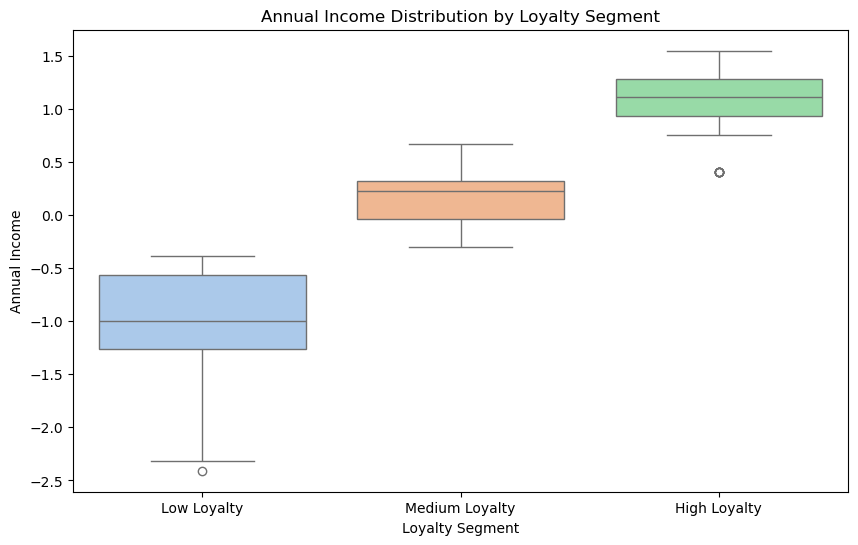

In [ ]:
# Box plot for annual income across loyalty segments
#A box plot can help identify income distribution across different loyalty levels, highlighting potential outliers and the spread within each segment.
plt.figure(figsize=(10, 6))
sns.boxplot(x='loyalty_segment', y='annual_income', data=data, palette='pastel')
plt.title('Annual Income Distribution by Loyalty Segment')
plt.xlabel('Loyalty Segment')
plt.ylabel('Annual Income')
plt.show()


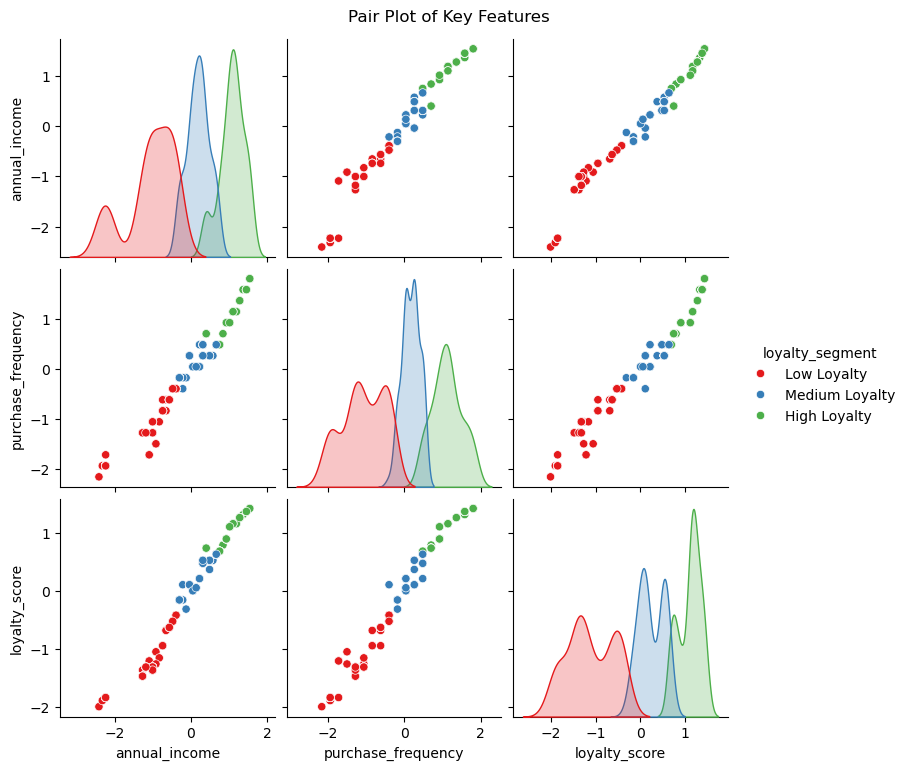

In [40]:
# Pair plot for key features
sns.pairplot(data, vars=['annual_income', 'purchase_frequency', 'loyalty_score'], hue='loyalty_segment', palette='Set1')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


/var/folders/xr/gtb6mfh504b28j9mv3bt9jlc0000gn/T/ipykernel_2627/2758031497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='frequency_bin', y='loyalty_score', data=data, palette='muted')


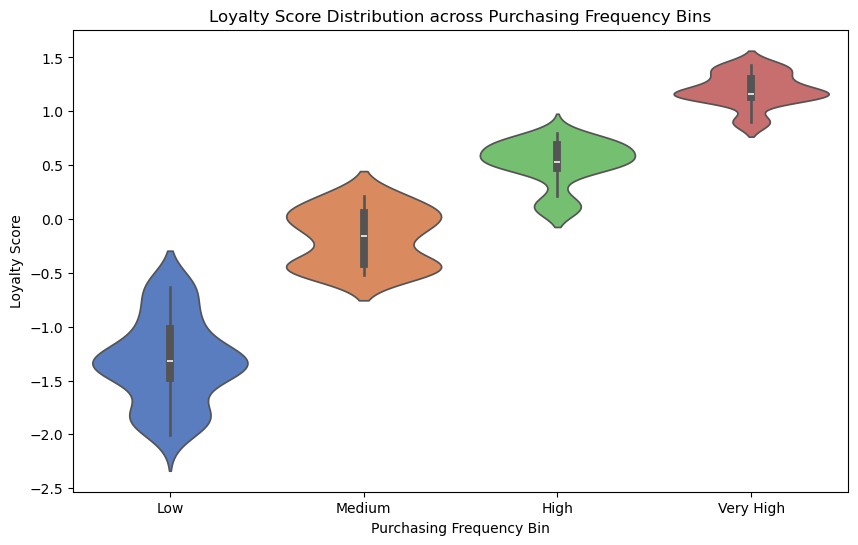

In [44]:
# Violin plot for loyalty score by purchasing frequency bins
data['frequency_bin'] = pd.qcut(data['purchase_frequency'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
plt.figure(figsize=(10, 6))
sns.violinplot(x='frequency_bin', y='loyalty_score', data=data, palette='muted')
plt.title('Loyalty Score Distribution across Purchasing Frequency Bins')
plt.xlabel('Purchasing Frequency Bin')
plt.ylabel('Loyalty Score')
plt.show()

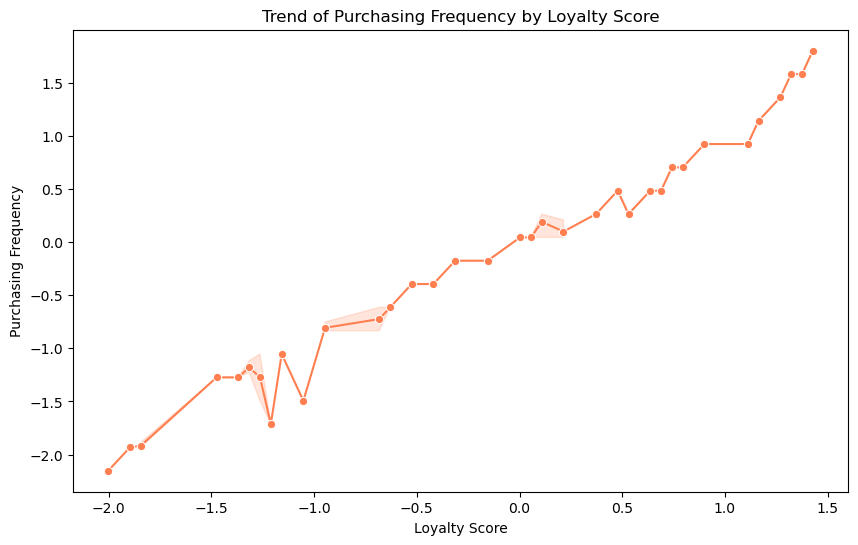

In [45]:
# Line plot for purchasing frequency across loyalty levels
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='loyalty_score', y='purchase_frequency', marker='o', color='coral')
plt.title('Trend of Purchasing Frequency by Loyalty Score')
plt.xlabel('Loyalty Score')
plt.ylabel('Purchasing Frequency')
plt.show()

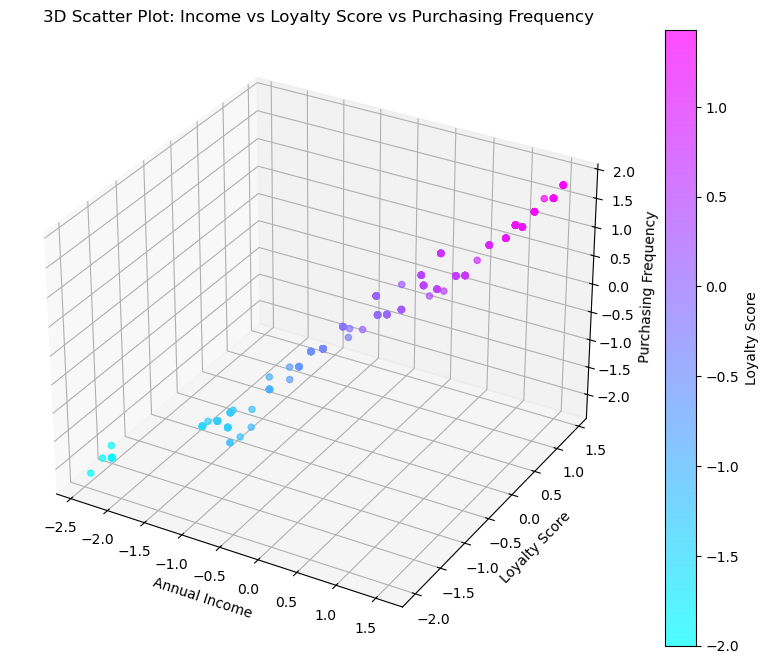

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['annual_income'], data['loyalty_score'], data['purchase_frequency'], 
                     c=data['loyalty_score'], cmap='cool', alpha=0.7)
ax.set_xlabel('Annual Income')
ax.set_ylabel('Loyalty Score')
ax.set_zlabel('Purchasing Frequency')
plt.title('3D Scatter Plot: Income vs Loyalty Score vs Purchasing Frequency')
plt.colorbar(scatter, ax=ax, label='Loyalty Score')
plt.show()


In [ ]:
#Model Selection and Training
# Define target and features
X = data.drop(['purchase_frequency'], axis=1)  # Replace target_variable with the actual target column name
y = data['purchase_frequency']  # Replace with the actual target column name


In [30]:
## Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [31]:
## Hyperparameter Tuning and Model Training
# Example with Random Forest (extend for other models as needed)
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 15, 20],
    }
}

In [32]:
# Train and tune each model
best_models = {}
for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        best_models[model_name] = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_models[model_name] = model

In [33]:
# Step 6: Model Evaluation
for model_name, model in best_models.items():
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}\n")

    # Cross-validation scores
    cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    print(f"Cross-Validation MAE: {np.abs(cross_val_scores).mean():.2f} ± {np.abs(cross_val_scores).std():.2f}")

Linear Regression Performance:
R² Score: 1.00
MAE: 0.02
MSE: 0.00
RMSE: 0.03

Cross-Validation MAE: 0.02 ± 0.01
Decision Tree Performance:
R² Score: 1.00
MAE: 0.02
MSE: 0.01
RMSE: 0.07

Cross-Validation MAE: 0.03 ± 0.05
Random Forest Performance:
R² Score: 1.00
MAE: 0.02
MSE: 0.00
RMSE: 0.05

Cross-Validation MAE: 0.02 ± 0.04


/var/folders/xr/gtb6mfh504b28j9mv3bt9jlc0000gn/T/ipykernel_2627/4206397797.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


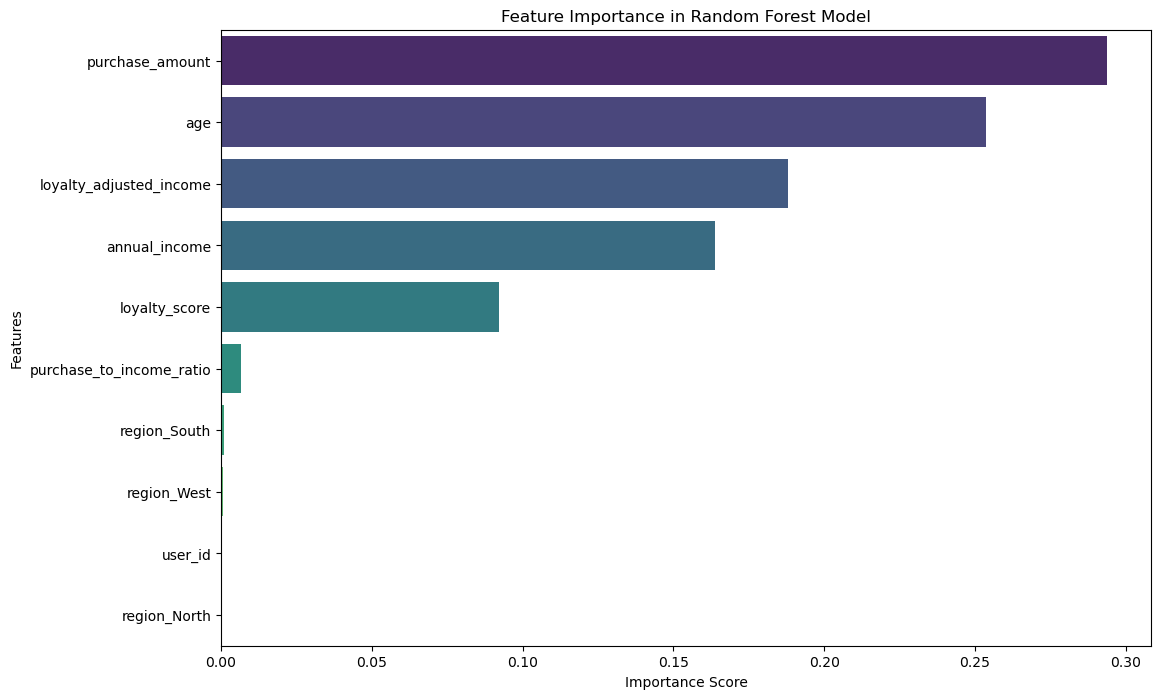

In [34]:
# Plot feature importance for the Random Forest model
importances = best_models['Random Forest'].feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [35]:
# Create loyalty and income segments based on quantiles or custom thresholds
data['income_segment'] = pd.qcut(data['annual_income'], q=3, labels=['Low Income', 'Medium Income', 'High Income'])
data['loyalty_segment'] = pd.qcut(data['loyalty_score'], q=3, labels=['Low Loyalty', 'Medium Loyalty', 'High Loyalty'])

# View count of customers in each segment for insights
segment_counts = data.groupby(['income_segment', 'loyalty_segment']).size().reset_index(name='Customer Count')
print("Customer Segment Counts:\n", segment_counts)


Customer Segment Counts:
   income_segment loyalty_segment  Customer Count
0     Low Income     Low Loyalty              90
1     Low Income  Medium Loyalty               0
2     Low Income    High Loyalty               0
3  Medium Income     Low Loyalty               0
4  Medium Income  Medium Loyalty              64
5  Medium Income    High Loyalty               7
6    High Income     Low Loyalty               0
7    High Income  Medium Loyalty               9
8    High Income    High Loyalty              68


/var/folders/xr/gtb6mfh504b28j9mv3bt9jlc0000gn/T/ipykernel_2627/788194612.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts = data.groupby(['income_segment', 'loyalty_segment']).size().reset_index(name='Customer Count')
